#Hierarchical Clustering - Agglomerative
In this notebook we will be looking at Agglomerative clustering,and we will also be using Complete Linkage as the Linkage Criteria.

First of all, let's import the relevant libraries:

In [2]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

##Generatig Random Data
We will be generating a set of data using the make_blobs class.

We will input these parameters into make_blobs:



*   n_samples: The total number of points equally divided among clusters.
  - Choosing a number from 10-1500

*   Centers: The number of centers to generate, or the fixed center locations.
  - Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers = [[1,1], [2,5]])


*   Cluster_std: The standars deviation of the clusters.


*   Choose a number between 0.5-1.5

Save the result to X1 and Y1.






In [7]:
X1, y1 = make_blobs(n_samples=50, centers =[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

Plot the scatter plot of the randomly generated data.



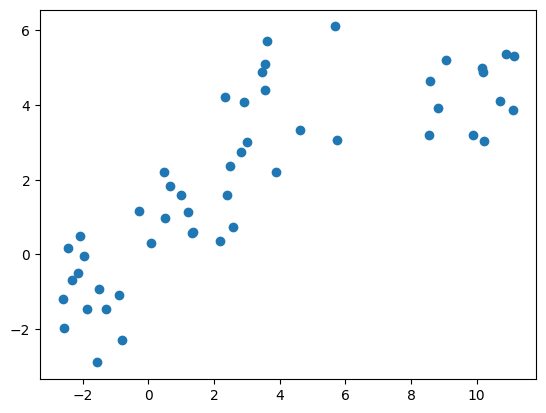

In [8]:
plt.scatter(X1[:,0], X1[:,1], marker='o')

## Agglomerative Clustering

We will start by clustering the random data points we just created.

The Agglomerative Clustering class will requiere two inputs:

* n_clusters: The number of clusters to form as well as the number of centroids to generate.

   -Value will be: 4.

* Linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

   -Value will be: 'complete'.

   -Note: It is recommended you try everything with 'average' as well.

Save the result to a variable called agglom .

In [9]:
agglom = AgglomerativeClustering(n_clusters= 4, linkage = 'average')

Fit the model with X2 and y2 from the generated data above.

In [10]:
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

##Plotting

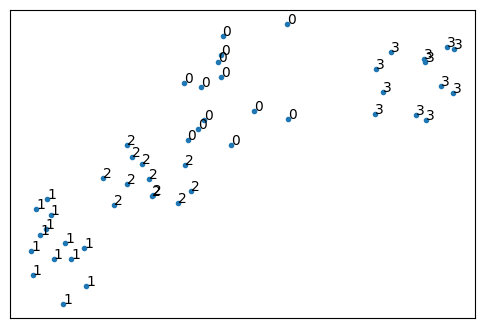

In [17]:
plt.figure(figsize= (6, 4 ))
x_min, x_max = np.min(X1,axis=0), np.max(X1, axis=0)
X1 = (X1 - x_min) / (x_max - x_min)

for i in range(X1.shape[0]):
  plt.text( X1[i, 0], X1[i, 1], str(y1[i])),
  color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
  fontdict={'weight': 'bold', 'size': 9}

plt.xticks([])
plt.yticks([])


plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()


##Dendrogram Associated for the Agglomerative Hierarchical Clustering

We will use the function distance_matrix, which requires two inputs, with the Feature Matrix, X1 as both inputs and save the distance matrix to a variable called dist_matrix.


In [22]:
dist_matrix = distance_matrix(X1, X1)
print(dist_matrix)

[[0.         1.05687264 0.29604252 ... 0.37187942 0.68384433 0.87191086]
 [1.05687264 0.         0.76264376 ... 0.68625639 0.38531    0.40252935]
 [0.29604252 0.76264376 0.         ... 0.09261671 0.38790178 0.59314159]
 ...
 [0.37187942 0.68625639 0.09261671 ... 0.         0.32486539 0.5586423 ]
 [0.68384433 0.38531    0.38790178 ... 0.32486539 0.         0.27526144]
 [0.87191086 0.40252935 0.59314159 ... 0.5586423  0.27526144 0.        ]]


Using the linkage class from hierarchy, pass in the parameters:

*The distance matrix


*'complete' for complete linkage



Save the result to a variable called T .

In [23]:
T = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-23-4618d53be5e6>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  T = hierarchy.linkage(dist_matrix, 'complete')


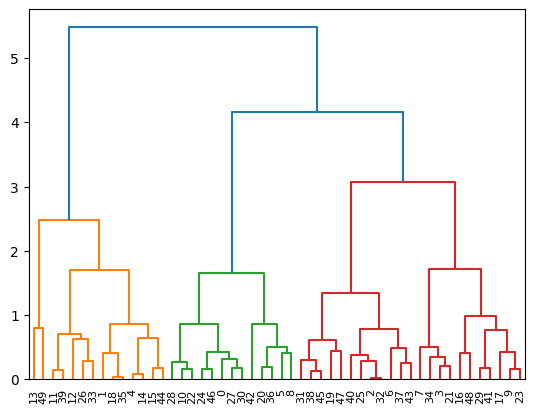

In [26]:
dendro = hierarchy.dendrogram(T)